# <div style="text-align: center"> HR Analytics Data Exploration and Cleaning </div>                               


####      <div style="text-align: right">  by- Lakshya Gupta & Abhiraj Singh</div>           

# Introduction
HR analytics is revolutionising the way human resources departments operate, leading to higher efficiency and better results overall. Human resources has been using analytics for years. However, the collection, processing and analysis of data has been largely manual, and given the nature of human resources dynamics and HR KPIs, the approach has been constraining HR. Therefore, it is surprising that HR departments woke up to the utility of machine learning so late in the game. 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from scipy.spatial import distance_matrix
from sklearn.preprocessing import scale
from sklearn import model_selection
from sklearn import metrics
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
train=pd.read_csv("train.csv")

In [0]:
test = pd.read_csv("test.csv")

In [0]:
train.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [0]:
describeDf=train.describe()
print(type(describeDf))
describeDf

<class 'pandas.core.frame.DataFrame'>


,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
count,54808.000000,54808.000000,54808.000000,50684.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000
mean,39195.830627,1.253011,34.803915,3.329256,5.865512,0.351974,0.023172,63.386750,0.085170
std,22586.581449,0.609264,7.660169,1.259993,4.265094,0.477590,0.150450,13.371559,0.279137
min,1.000000,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000,0.000000
25%,19669.750000,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000,0.000000
50%,39225.500000,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000,0.000000
75%,58730.500000,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000,0.000000
max,78298.000000,10.000000,60.000000,5.000000,37.000000,1.000000,1.000000,99.000000,1.000000


In [0]:
y_train=train['is_promoted']
x_train=train.drop(columns=['is_promoted'])

In [0]:
#preprocess pipeline
from sklearn.compose import ColumnTransformer 
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer, KNNImputer


dropColumnList= ['employee_id']
imputeList = ['education']
knnImputeList = ['previous_year_rating']
catColumnList=['department', 'region','education','gender','recruitment_channel']



# Preprocessing

* drop columns
* NA values of education
* KNN Impute for previous_year_rating
* onehot encoding

In [0]:
def preprocessing(data):
    
    data = data.drop(columns=['employee_id'])   #drop columns
    
    for column in imputeList:
        data[column].fillna('unknown',inplace=True)
        
    data= pd.get_dummies(data) 
    
    data_columns=data.columns
    
    
    
    imputer = KNNImputer(n_neighbors=11)
    data=imputer.fit_transform(data)
    
    data=pd.DataFrame(data, columns=data_columns)
    
    return data

    
    

In [8]:
print(x_train.shape)
x_train.head(12)

(54808, 13)


,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73
5,58896,Analytics,region_2,Bachelor's,m,sourcing,2,31,3.0,7,0,0,85
6,20379,Operations,region_20,Bachelor's,f,other,1,31,3.0,5,0,0,59
7,16290,Operations,region_34,Master's & above,m,sourcing,1,33,3.0,6,0,0,63
8,73202,Analytics,region_20,Bachelor's,m,other,1,28,4.0,5,0,0,83
9,28911,Sales & Marketing,region_1,Master's & above,m,sourcing,1,32,5.0,5,1,0,54


In [9]:
x_train=preprocessing(x_train)
print(x_train.shape)
x_train.head(12)

(54808, 59)


,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,department_Analytics,department_Finance,department_HR,department_Legal,department_Operations,department_Procurement,department_R&D,department_Sales & Marketing,department_Technology,region_region_1,region_region_10,region_region_11,region_region_12,region_region_13,region_region_14,region_region_15,region_region_16,region_region_17,region_region_18,region_region_19,region_region_2,region_region_20,region_region_21,region_region_22,region_region_23,region_region_24,region_region_25,region_region_26,region_region_27,region_region_28,region_region_29,region_region_3,region_region_30,region_region_31,region_region_32,region_region_33,region_region_34,region_region_4,region_region_5,region_region_6,region_region_7,region_region_8,region_region_9,education_Bachelor's,education_Below Secondary,education_Master's & above,education_unknown,gender_f,gender_m,recruitment_channel_other,recruitment_channel_referred,recruitment_channel_sourcing
0,1.0,35.0,5.000000,8.0,1.0,0.0,49.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
1,1.0,30.0,5.000000,4.0,0.0,0.0,60.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
2,1.0,34.0,3.000000,7.0,0.0,0.0,50.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,2.0,39.0,1.000000,10.0,0.0,0.0,50.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
4,1.0,45.0,3.000000,2.0,0.0,0.0,73.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
5,2.0,31.0,3.000000,7.0,0.0,0.0,85.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
6,1.0,31.0,3.000000,5.0,0.0,0.0,59.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
7,1.0,33.0,3.000000,6.0,0.0,0.0,63.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
8,1.0,28.0,4.000000,5.0,0.0,0.0,83.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
9,1.0,32.0,5.000000,5.0,1.0,0.0,54.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0


In [0]:
imputedRatingsDf=x_train[train['previous_year_rating'].isnull()]
imputedRatings=imputedRatingsDf['previous_year_rating']
imputedRatings

10       2.909091
23       3.000000
29       3.545455
56       3.272727
58       3.727273
           ...   
54703    3.363636
54734    3.454545
54746    3.818182
54773    3.363636
54801    2.090909
Name: previous_year_rating, Length: 4124, dtype: float64

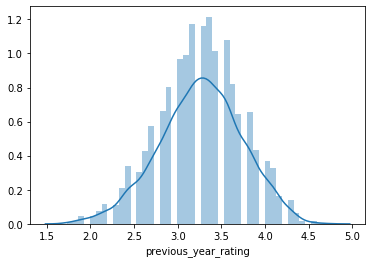

In [0]:
sns.distplot(imputedRatings)

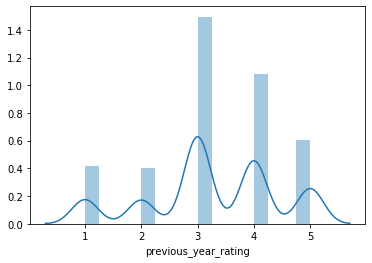

In [0]:
sns.distplot(train['previous_year_rating'][train['length_of_service']==1])

In [0]:
x_train['previous_year_rating'][10]

2.909090909090909

### Train Validation Spliting

75:25

In [0]:
X_train, X_val, Y_train, Y_val = train_test_split(x_train, y_train, test_size=0.25, random_state=12)

## Basemodel

In [0]:
from sklearn.linear_model import LogisticRegression

logr_pipe = make_pipeline( LogisticRegression(solver='lbfgs',max_iter=100))
model_Lr=logr_pipe.fit(X_train, Y_train)

C:\Users\ilaks\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [0]:
from sklearn.pipeline import make_pipeline
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, cross_validate, ShuffleSplit, LeaveOneOut
from sklearn import metrics

In [0]:
y_pred = model_Lr.predict(X_val)
print(f"Accuracy: {round(metrics.accuracy_score(Y_val, y_pred)*100, 2)}%")
print(f"Balanced Accuracy: {round(metrics.balanced_accuracy_score(Y_val, y_pred)*100, 2)}%")

print(classification_report(Y_val,y_pred))
df_confusion = pd.crosstab(Y_val, y_pred)
df_confusion

Accuracy: 92.13%
Balanced Accuracy: 58.16%
              precision    recall  f1-score   support

           0       0.93      0.99      0.96     12533
           1       0.65      0.17      0.27      1169

    accuracy                           0.92     13702
   macro avg       0.79      0.58      0.62     13702
weighted avg       0.90      0.92      0.90     13702



col_0,0,1
is_promoted,,
0,12423,110
1,968,201


In [0]:
mythreshold=0.1
y_pred = (model_Lr.predict_proba(X_val) >= mythreshold).astype(int)
#y_pred = model_Lr.predict(X_val)
y_pred=y_pred[:,1]
#y_pred
print(f"Accuracy: {round(metrics.accuracy_score(Y_val, y_pred)*100, 2)}%")
print(f"Balanced Accuracy: {round(metrics.balanced_accuracy_score(Y_val, y_pred)*100, 2)}%")

print(classification_report(Y_val,y_pred))
df_confusion = pd.crosstab(Y_val, y_pred)
df_confusion

Accuracy: 78.05%
Balanced Accuracy: 73.57%
              precision    recall  f1-score   support

           0       0.96      0.79      0.87     12533
           1       0.23      0.68      0.35      1169

    accuracy                           0.78     13702
   macro avg       0.60      0.74      0.61     13702
weighted avg       0.90      0.78      0.82     13702



col_0,0,1
is_promoted,,
0,9897,2636
1,372,797


## SMOTE

In [12]:
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [13]:
sm = SMOTE(random_state=0,sampling_strategy=0.9)
X_SMOTE, y_SMOTE = sm.fit_resample(X_train, Y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [0]:
logr_pipe = make_pipeline( LogisticRegression(solver='lbfgs',max_iter=100))
model_Lr=logr_pipe.fit(X_SMOTE, y_SMOTE)

C:\Users\ilaks\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [0]:
y_SMOTE.sum()

33846

In [0]:
mythreshold=0.48
y_pred = (model_Lr.predict_proba(X_val) >= mythreshold).astype(int)
#y_pred = model_Lr.predict(X_val)
y_pred=y_pred[:,1]
#y_pred
print(f"Accuracy: {round(metrics.accuracy_score(Y_val, y_pred)*100, 2)}%")
print(f"Balanced Accuracy: {round(metrics.balanced_accuracy_score(Y_val, y_pred)*100, 2)}%")

print(classification_report(Y_val,y_pred))
df_confusion = pd.crosstab(Y_val, y_pred)
df_confusion

Accuracy: 75.42%
Balanced Accuracy: 74.58%
              precision    recall  f1-score   support

           0       0.97      0.76      0.85     12533
           1       0.22      0.74      0.34      1169

    accuracy                           0.75     13702
   macro avg       0.59      0.75      0.59     13702
weighted avg       0.90      0.75      0.81     13702



col_0,0,1
is_promoted,,
0,9474,3059
1,309,860


In [0]:
#
from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier(random_state=0)
model_gbt = clf.fit(X_SMOTE, y_SMOTE)
# clf.predict(X_test[:2])
# clf.score(X_SMOTE, Y_SMOTE)

In [20]:
y_pred = model_gbt.predict(X_val)
print(f"Accuracy: {round(metrics.accuracy_score(Y_val, y_pred)*100, 2)}%")
print(f"Balanced Accuracy: {round(metrics.balanced_accuracy_score(Y_val, y_pred)*100, 2)}%")

print(classification_report(Y_val,y_pred))
df_confusion = pd.crosstab(Y_val, y_pred)
df_confusion

Accuracy: 92.64%
Balanced Accuracy: 63.21%
              precision    recall  f1-score   support

           0       0.94      0.99      0.96     12533
           1       0.67      0.28      0.39      1169

    accuracy                           0.93     13702
   macro avg       0.80      0.63      0.68     13702
weighted avg       0.91      0.93      0.91     13702



col_0,0,1
is_promoted,,
0,12370,163
1,845,324


In [0]:
grid_values = {'n_estimators': [500,100],'min_samples_split':[250,300,350],'min_samples_leaf':[50],'max_depth':[5,6], 'max_features':['sqrt']}
grid_clf_acc = GridSearchCV(clf, param_grid = grid_values,scoring = 'f1',cv=3,n_jobs=-1)
model_gbt_cv = grid_clf_acc.fit(X_SMOTE, y_SMOTE)
y_pred_acc = model_gbt_cv.predict(X_val)

In [27]:
y_pred = model_gbt_cv.predict(X_val)
print(f"Accuracy: {round(metrics.accuracy_score(Y_val, y_pred)*100, 2)}%")
print(f"Balanced Accuracy: {round(metrics.balanced_accuracy_score(Y_val, y_pred)*100, 2)}%")

print(classification_report(Y_val,y_pred))
df_confusion = pd.crosstab(Y_val, y_pred)
df_confusion

Accuracy: 93.85%
Balanced Accuracy: 66.39%
              precision    recall  f1-score   support

           0       0.94      1.00      0.97     12533
           1       0.86      0.33      0.48      1169

    accuracy                           0.94     13702
   macro avg       0.90      0.66      0.72     13702
weighted avg       0.93      0.94      0.93     13702



col_0,0,1
is_promoted,,
0,12471,62
1,780,389


In [28]:
model_gbt_cv.best_params_

{'max_depth': 5,
 'max_features': 'sqrt',
 'min_samples_leaf': 50,
 'min_samples_split': 350,
 'n_estimators': 500}

In [0]:
#250-500 min_sample_split  0.5-1% of total data
#min_samples_leaf = 50
#max_depth = 8 .. should be 5-8
#max_features = ‘sqrt’


In [0]:
grid_values = {'n_estimators': [500,650],'min_samples_split':[50,100,350],'min_samples_leaf':[10,20,50],'max_depth':[4,5,6,7], 'max_features':[6,7,8,9]}
grid_clf_acc = GridSearchCV(clf, param_grid = grid_values,scoring = 'f1',cv=3,n_jobs=-1)
model_gbt_cv = grid_clf_acc.fit(X_SMOTE, y_SMOTE)
y_pred_acc = model_gbt_cv.predict(X_val)

In [0]:
y_pred = model_gbt_cv.predict(X_val)
print(f"Accuracy: {round(metrics.accuracy_score(Y_val, y_pred)*100, 2)}%")
print(f"Balanced Accuracy: {round(metrics.balanced_accuracy_score(Y_val, y_pred)*100, 2)}%")

print(classification_report(Y_val,y_pred))
df_confusion = pd.crosstab(Y_val, y_pred)
df_confusion